In [62]:
import matplotlib
import matplotlib.pyplot as plt
from pandas import read_csv


In [39]:
data = read_csv('t551_for_analysis.csv')
data_error = read_csv('relative_errors_by_bioregion.csv')

In [40]:
# we need breakdowns by bioregion for 'STATE FOREST' and 'PARK/RESERVE'
# save the plot data to csv as well
tenures = ['STATE FOREST', 'PARK/RESERVE']
header = 'tenure,bioregion,' \
         'dead_basal_area,'\
         'dead_basal_area_error,'\
         'total_area,' \
         'total_area_error\n'

In [43]:
with open('basal_area_plot_info.csv', 'w') as w:
    w.writelines(header)

for tenure in tenures:
    for bioregion in data.BioRegion.unique():
        data_subset = data.loc[(data.Tenure == tenure) & (data.BioRegion == bioregion)]
        local_error = data_error.loc[data_error.bioregion == bioregion].error_bar.astype(float).values[0]
        if data_subset.Tenure.size > 0:
            total_area = data_subset.t551_DBH * data_subset.t551_DBH * 3.14
            total_area = total_area.sum()
            total_area_error = local_error*total_area

            dead_data_subset = data_subset.loc[data_subset.t551_TreeStatus == 'DS']
            dead_basal_area = dead_data_subset.t551_DBH * dead_data_subset.t551_DBH * 3.14
            dead_basal_area = dead_basal_area.sum()
            dead_basal_area_error = dead_basal_area*local_error

            output_line = f'{tenure},{bioregion},' \
                          f'{dead_basal_area:.2f},' \
                          f'{dead_basal_area_error:.2f},' \
                          f'{total_area:.2f},' \
                          f'{total_area_error:.2f}\n'
        else:
            output_line = f'{tenure},{bioregion},0,0,0,0\n'

        with open('basal_area_plot_info.csv', 'a') as a:
            a.writelines(output_line)


In [44]:
plot_data = read_csv('basal_area_plot_info.csv')

In [66]:
parks_data = plot_data.loc[plot_data.tenure == 'PARK/RESERVE']
sf_data = plot_data.loc[plot_data.tenure == 'STATE FOREST']

In [96]:
bioregions = plot_data.bioregion.unique()
tick_labels = bioregions
for index,value in enumerate(tick_labels):
    tick_labels[index] = str(tick_labels[index]).replace(' ', '\n')
    
x_tick_locations =  list(range(1, len(bioregions)+1))


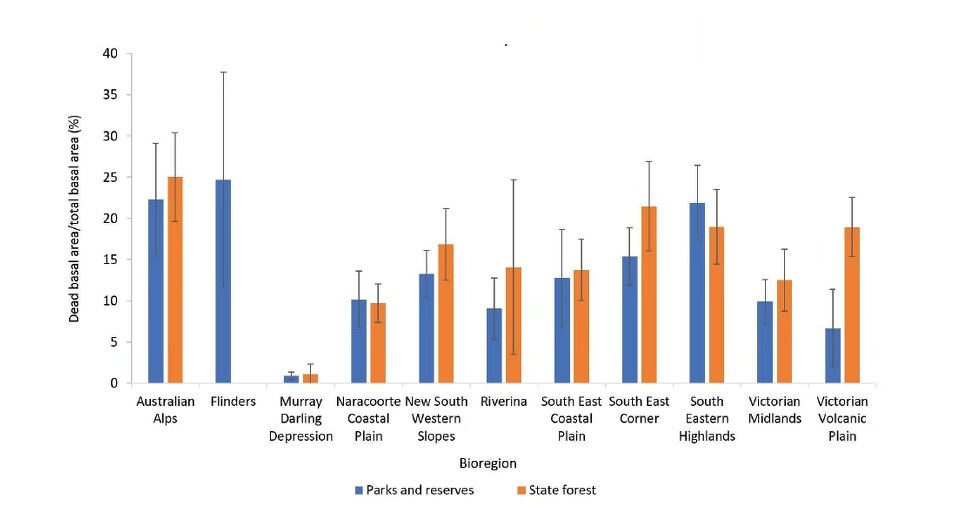

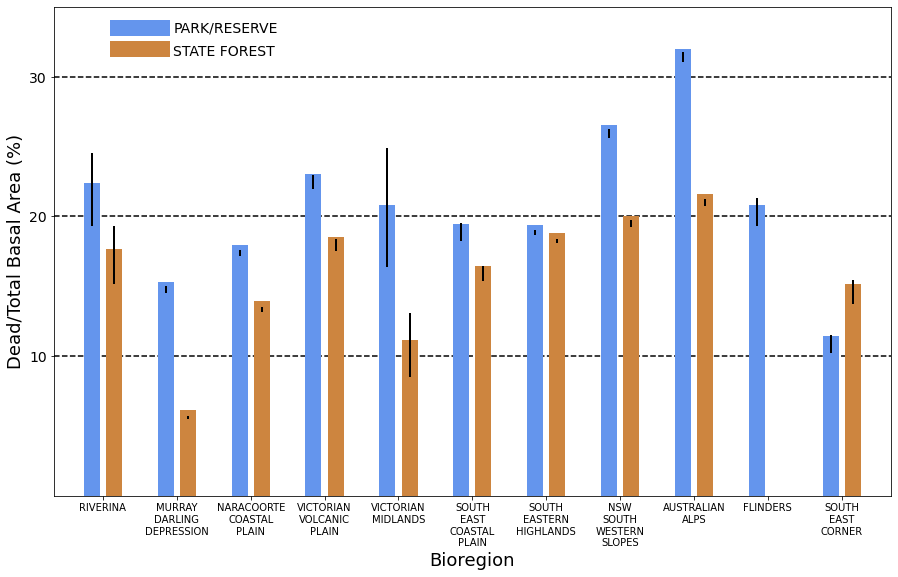

In [187]:
y_park_values = parks_data.dead_basal_area/parks_data.total_area
y_park_low_error = (parks_data.dead_basal_area - parks_data.dead_basal_area_error)/(parks_data.total_area + parks_data.total_area_error) 
y_park_high_error = (parks_data.dead_basal_area + parks_data.dead_basal_area_error)/(parks_data.total_area - parks_data.total_area_error)

y_sf_values = sf_data.dead_basal_area/sf_data.total_area
y_sf_low_error = (sf_data.dead_basal_area - sf_data.dead_basal_area_error)/(sf_data.total_area + sf_data.total_area_error) 
y_sf_high_error = (sf_data.dead_basal_area + sf_data.dead_basal_area_error)/(sf_data.total_area - sf_data.total_area_error)

output_image_name = 'F08_18_DEAD_TO_TOTAL_BASAL_AREA_PCT.jpg'
plt.figure(figsize=(15, 9))

matplotlib.rc('xtick', labelsize=10)
matplotlib.rc('ytick', labelsize=14)

for index, value in enumerate(y_park_values):
    if value > 0:
        # plot value
        plt.plot(
            [x_tick_locations[index]-0.15, x_tick_locations[index]-0.15], 
            [0, value], 
            linewidth=16, 
            color='cornflowerblue'
        )
        # now plot error bar
        plt.plot(
            [x_tick_locations[index]-0.15, x_tick_locations[index]-0.15], 
            [list(y_park_low_error)[index], 
             list(y_park_high_error)[index]],
            linewidth=2,
            color='black',
            linestyle='-'
        )

    if y_sf_values[index] > 0:
        plt.plot(
            [x_tick_locations[index]+0.15, x_tick_locations[index]+0.15], 
            [0, y_sf_values[index]], 
            linewidth=16, 
            color='peru'
        )   
        # now plot error bar
        plt.plot(
            [x_tick_locations[index]+0.15, x_tick_locations[index]+0.15], 
            [list(y_sf_low_error)[index], 
             list(y_sf_high_error)[index]],
            linewidth=2,
            color='black',
            linestyle='-'
        )
plt.xticks(ticks=x_tick_locations, labels=tick_labels)
plt.ylim([0, 0.35])
plt.yticks(ticks=[0.1, 0.2, 0.3], labels=['10', '20', '30'])
plt.grid(color='black', linestyle = '--', linewidth = 1.5, axis='y')
plt.ylabel('Dead/Total Basal Area (%)',fontsize=18)
plt.xlabel('Bioregion',fontsize=18)

# add legend
plt.plot([1.2, 1.8], [0.335, 0.335], linewidth=16, color='cornflowerblue')
plt.text(1.95, 0.332, 'PARK/RESERVE', fontsize=14)
plt.text(1.95, 0.315, 'STATE FOREST', fontsize=14)

plt.plot([1.2, 1.8], [0.32, 0.32], linewidth=16, color='peru')
plt.savefig(output_image_name)


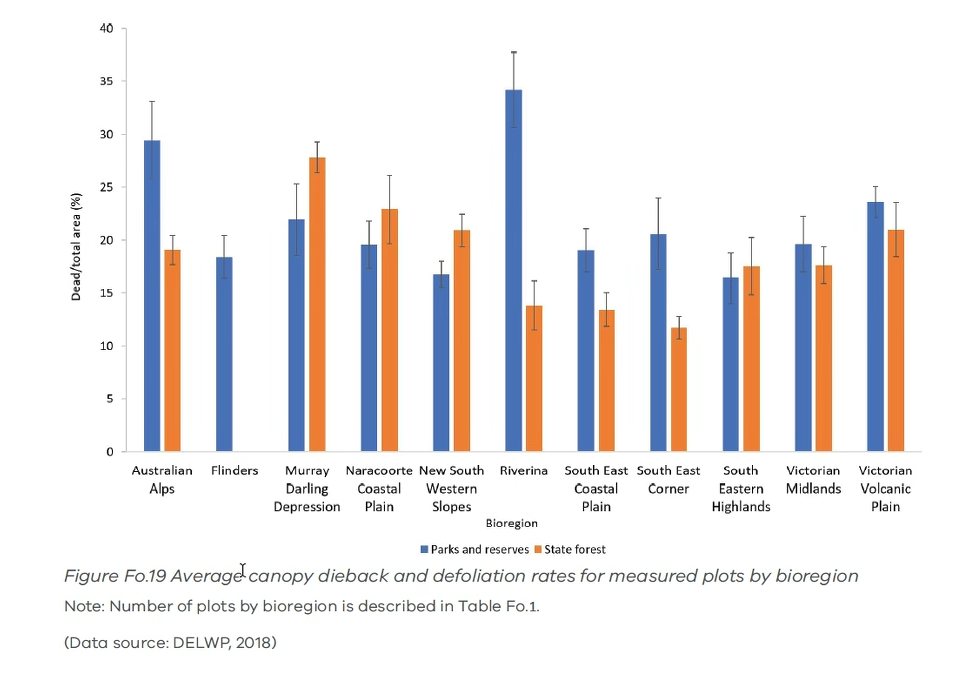

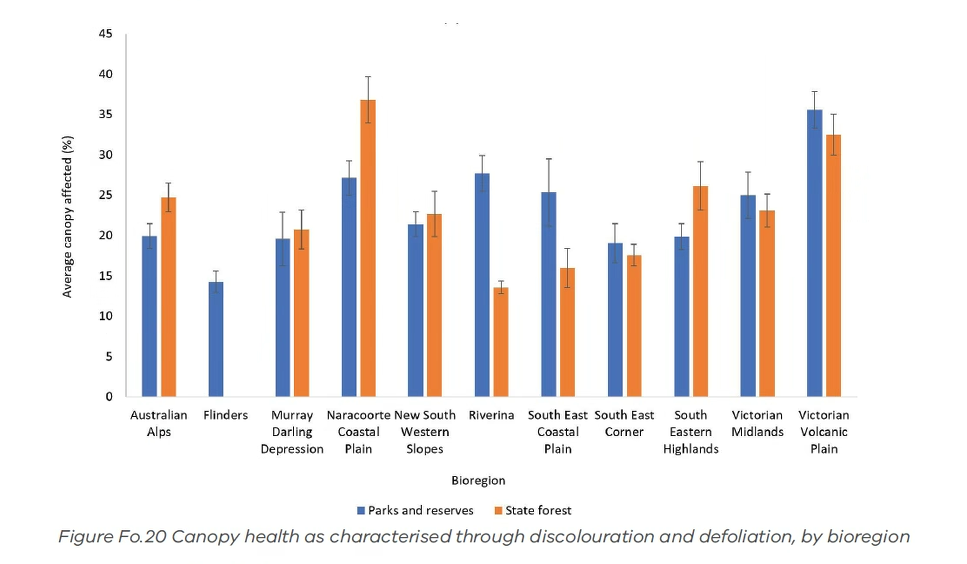